# Import Libraries 

In [1]:
import datetime

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Read in dataset and drop unecessary tables

In [2]:
#read in
demographics = pd.read_csv("./data/DEMOGRAPHICS.csv" , usecols=['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name'])
summary = pd.read_csv("./data/SUMMARYMEASURESOFHEALTH.csv", usecols=[ 'Health_Status', 'Unhealthy_Days'])
measure = pd.read_csv("./data/MEASURESOFBIRTHANDDEATH.csv", usecols=['Premature','Under_18', 'Over_40', 'Infant_Mortality', 'IM_Postneonatal', 'IM_Neonatal'])
vunerable  = pd.read_csv("./data/VUNERABLEPOPSANDENVHEALTH.csv", usecols=['Toxic_Chem', 'Recent_Drug_Use'])
risk = pd.read_csv("./data/RISKFACTORSANDACCESSTOCARE.csv", usecols=['Obesity','High_Blood_Pres','Smoker','Diabetes'])

In [3]:
#merge
full = pd.concat([demographics, summary, measure, vunerable,risk], axis=1, join="inner")
selected = full.copy()
selected.drop('CHSI_County_Name', axis=1, inplace=True)
selected.drop('CHSI_State_Name', axis=1, inplace=True)
selected.drop('State_FIPS_Code', axis=1, inplace=True)
selected.drop('County_FIPS_Code', axis=1, inplace=True)
selected.drop('Infant_Mortality', axis=1, inplace=True)

In [4]:
selected.info()
selected.describe()

print('\nMissing Values')
print((selected == -1111.1).sum() + (selected == -2222.2).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 13 columns):
Health_Status      3141 non-null float64
Unhealthy_Days     3141 non-null float64
Premature          3141 non-null float64
Under_18           3141 non-null float64
Over_40            3141 non-null float64
IM_Neonatal        3141 non-null float64
IM_Postneonatal    3141 non-null float64
Recent_Drug_Use    3141 non-null int64
Toxic_Chem         3141 non-null int64
Obesity            3141 non-null float64
High_Blood_Pres    3141 non-null float64
Smoker             3141 non-null float64
Diabetes           3141 non-null float64
dtypes: float64(11), int64(2)
memory usage: 319.1 KB

Missing Values
Health_Status       664
Unhealthy_Days      545
Premature            17
Under_18             79
Over_40             130
IM_Neonatal         287
IM_Postneonatal     292
Recent_Drug_Use       0
Toxic_Chem            0
Obesity             917
High_Blood_Pres    1619
Smoker              874
Diabete

# Impute the data and fill empty data with mean values

In [5]:
selected = selected.replace(-1111.1, np.NaN)
selected = selected.replace(-1111, np.NaN)
selected = selected.replace(-1, np.NaN)

selected = selected.replace(-2222.2, np.NaN)
selected = selected.replace(-2222, np.NaN)
selected = selected.replace(-2, np.NaN)

selected = selected.replace(-9999, np.NaN)

# fill missing values with mean column values
selected.fillna(selected.mean(), inplace=True)
# count the number of NaN values in each column

# Viewing the data 

,Health_Status,Unhealthy_Days,Premature,Under_18,Over_40,IM_Neonatal,IM_Postneonatal,Recent_Drug_Use,Toxic_Chem,Obesity,High_Blood_Pres,Smoker,Diabetes
count,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000
mean,17.316754,6.106394,11.877401,4.750131,1.742976,4.759951,2.609828,5323.731614,1.857627e+06,24.145189,26.480946,23.112880,7.810188
std,5.406163,1.218892,2.392148,2.262823,0.894922,2.072631,1.395145,18738.553988,1.019790e+07,4.126357,3.783796,4.870894,2.572103
min,2.200000,2.200000,5.100000,0.300000,0.200000,0.000000,0.000000,2.000000,0.000000e+00,4.200000,7.200000,3.600000,0.500000
25%,13.900000,5.400000,10.200000,3.100000,1.200000,3.400000,1.700000,548.000000,4.159300e+04,22.500000,26.400000,20.900000,6.200000
50%,17.316754,6.106394,11.700000,4.400000,1.600000,4.700000,2.600000,1319.000000,5.165420e+05,24.145189,26.480946,23.112880,7.810188
75%,19.400000,6.600000,13.200000,6.000000,2.100000,5.700000,3.200000,3573.000000,1.857627e+06,25.800000,26.480946,25.100000,9.100000
max,47.700000,12.600000,23.500000,14.500000,9.100000,18.800000,14.200000,665392.000000,4.987494e+08,42.600000,47.100000,46.200000,20.800000


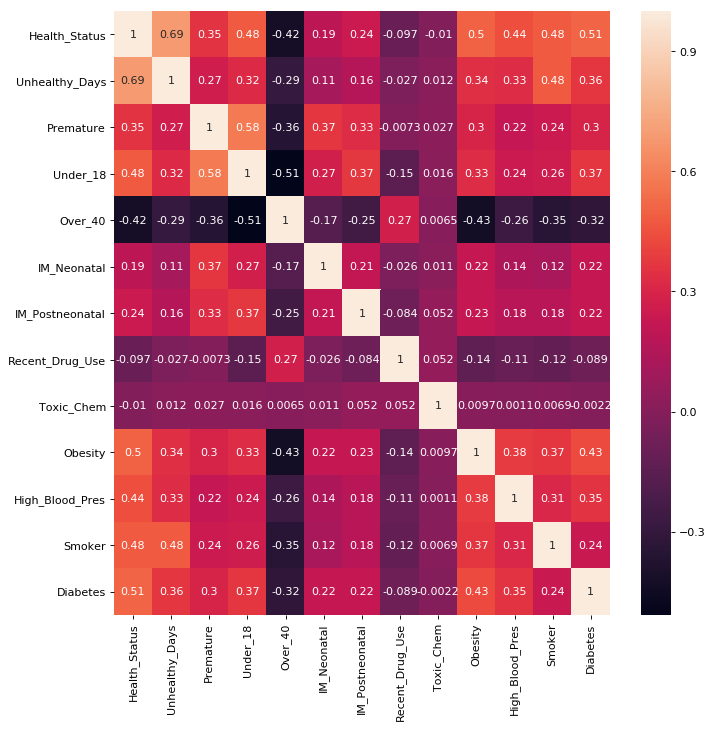

In [6]:
corr = selected.corr()
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='b')
sns.heatmap(corr, annot=True)

selected.head()
selected.describe()

# Split data set to testing and training 

In [7]:
target = pd.DataFrame(full, columns=["Infant_Mortality"])
X_train, X_test, y_train, y_test = train_test_split(selected, target, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2512, 13)
(2512, 1)
(629, 13)
(629, 1)


In [8]:
#m = KNeighborsRegressor(n_neighbors=3)
#m = linear_model.LinearRegression()
#m = linear_model.LassoLars(alpha=.1)
from sklearn.ensemble import BaggingRegressor as br
m = DecisionTreeRegressor(splitter= 'best',
    max_features= 7,
    max_depth= 6)

b = br(bootstrap = True, n_jobs =-1, n_estimators = 6)
model = m.fit(X_train, y_train)
modelb = b.fit(X_train, y_train)
predictions = m.predict(X_test)
bpredictions = b.predict(X_test)

print(predictions.shape)
print(bpredictions.shape)

/home/r3pwn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


(629,)
(629,)


(0, 25)

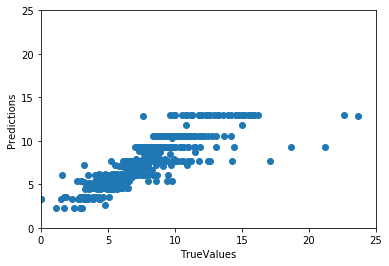

In [9]:
#{'min_samples_split': 2,
# 'min_samples_leaf': 2,
## 'max_leaf_nodes': 10,
# 'max_depth': 25}

plt.scatter(y_test.values, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

(0, 25)

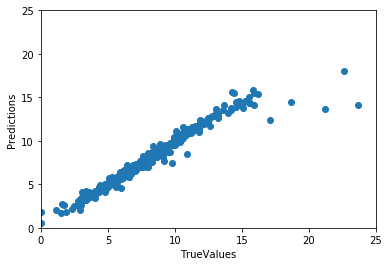

In [10]:
plt.scatter(y_test.values, bpredictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')
plt.xlim(0, 25)
plt.ylim(0, 25)

In [11]:
print("Score: {}".format(model.score(X_test, y_test)))

print("Feature Importances:")
fImport = dict(zip(selected.columns, m.feature_importances_))
for i in zip( fImport.keys(), fImport.values()):
    print(i)

Score: 0.9322953945704706
Feature Importances:
('Health_Status', 0.0)
('Unhealthy_Days', 5.984681891330515e-09)
('Premature', 0.011432750014949065)
('Under_18', 0.0023224577781468013)
('Over_40', 0.0031341707890671666)
('IM_Neonatal', 0.28468281178469257)
('IM_Postneonatal', 0.014023608511655732)
('Recent_Drug_Use', 0.6613048884700599)
('Toxic_Chem', 0.008223515407044604)
('Obesity', 0.005076004539641439)
('High_Blood_Pres', 0.005903701992221019)
('Smoker', 1.4248692467924995e-07)
('Diabetes', 0.0038959422409152104)


In [12]:
print(X_test.shape)

(629, 13)


In [13]:
from sklearn import tree

tree.export_graphviz(m, out_file='tree.dot')  

# Cross Validation and Feature Results

In [14]:
model.score(X_test, y_test)
fImport = dict(zip(selected.columns, m.feature_importances_))
for i in zip( fImport.keys(), fImport.values()):
    print(i)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(m, selected, target, cv=4)
scoresb = cross_val_score(b, selected, target, cv=4)

print("Decision Reg Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Bagging Reg Accuracy: %0.2f (+/- %0.2f)" % (scoresb.mean(), scoresb.std() * 2))

('Health_Status', 0.0)
('Unhealthy_Days', 5.984681891330515e-09)
('Premature', 0.011432750014949065)
('Under_18', 0.0023224577781468013)
('Over_40', 0.0031341707890671666)
('IM_Neonatal', 0.28468281178469257)
('IM_Postneonatal', 0.014023608511655732)
('Recent_Drug_Use', 0.6613048884700599)
('Toxic_Chem', 0.008223515407044604)
('Obesity', 0.005076004539641439)
('High_Blood_Pres', 0.005903701992221019)
('Smoker', 1.4248692467924995e-07)
('Diabetes', 0.0038959422409152104)


/home/r3pwn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/r3pwn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/r3pwn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/home/r3pwn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:397: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Decision Reg Accuracy: 0.84 (+/- 0.14)
Bagging Reg Accuracy: 0.84 (+/- 0.11)


In [15]:
print(X_test.shape)

(629, 13)


# Geographical heatmap

In [17]:
from geopy import geocoders
import gmaps

#gn0 = geocoders.GeoNames(username="r3pwn")
#gn1 = geocoders.GeoNames(username="aprogramdev")
#gn2 = geocoders.GeoNames(username="sapienza47")
#gn3 = geocoders.GeoNames(username="kiaforte2017")

with open('apikey.txt') as f:
    apikey = f.readline()
    f.close
    
gmaps.configure(api_key=apikey)

#def select_gn(index):
#    if j == 0:
#        return gn0
#    if j == 1:
#        return gn1
#    if j == 2:
#        return gn2
#    if j == 3:
#        return gn3

In [18]:
col = ['State', 'County', 'Latitude', 'Longitude']
places = []

#j = 0
#for i in range(len(full['CHSI_County_Name'])):
#    if j > 3:
#        j = 0
#    gn = select_gn(j)
#    county = full['CHSI_County_Name'][i]
#    state = full['CHSI_State_Name'][i]
#    im = full['Infant_Mortality'][i]
#    loc = gn.geocode("{} {}".format(county, state), timeout=100)
#    lat = loc.latitude
#    lon = loc.longitude
#    j = j + 1
#    places.append([state, county, lat, lon])
    
#im_places_df = pd.DataFrame(places, columns=col)

#im_places_df.to_csv('data/places_with_coords.csv')

im_places_df = pd.read_csv('./data/places_with_coords.csv')

print(im_places_df)

      Unnamed: 0      State       County  Latitude  Longitude
0              0    Alabama      Autauga  32.46402  -86.45970
1              1    Alabama      Baldwin  30.52297  -87.90333
2              2    Alabama      Barbour  31.89127  -85.14549
3              3    Alabama         Bibb  32.99864  -87.12644
4              4    Alabama       Blount  33.99093  -86.57749
5              5    Alabama      Bullock  32.10055  -85.71570
6              6    Alabama       Butler  31.75243  -86.68029
7              7    Alabama      Calhoun  33.65983  -85.83163
8              8    Alabama     Chambers  32.81874  -85.17939
9              9    Alabama     Cherokee  34.17982  -85.76136
10            10    Alabama      Chilton  32.83874  -86.62943
11            11    Alabama      Choctaw  32.01961  -88.26320
12            12    Alabama       Clarke  31.91349  -87.73584
13            13    Alabama         Clay  33.31067  -85.75441
14            14    Alabama     Cleburne  33.67456  -85.51877
15      

In [20]:
locations = im_places_df[['Latitude', 'Longitude']]

# Get the magnitude from the data
weights = full['Infant_Mortality']
weights = weights.replace(-1111.1, np.NaN)
weights = weights.replace(-2222.2, np.NaN)
weights = weights.replace(-4444.4, np.NaN)
weights = weights.apply(lambda x: x*3)
weights.fillna(weights.mean(), inplace=True)

# Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

InvalidWeightException: -3333.2999999999997 is not a valid weight. Weights must be non-negative.

end of document